<p style="text-align:center; font-size: 24px; font-family: Times New Roman, Times, serif">
<b>Analyzing Bike Sharing Systems: A Comparison of Machine Learning Models</b>
</p>

<p style="text-align:center; font-size: 14px; font-family: Times New Roman, Times, serif">
Prince Joseph Erneszer Javier, Reynaldo Tugade Jr.
</p>

<p style="text-align:center; font-size: 12px; font-family: Times New Roman, Times, serif">
MS Data Science<br>
Asian Institute of Management
</p>


<div style="width: 90%">
<p style="text-align:left; font-size: 20px; font-family: Times New Roman, Times, serif;">
Abstract
</p>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
In performing data analysis, a common task is to search the most appropriate algorithm(s) to best resemble a given system. In this report, we demonstrate the suitability of using a neural network in predicting the potential number of users using combined historical rental and weather information. The idea is to augment previous machine learning models and discover the possibility of getting better test accuracy. We used K-Nearest Neighbor, Linear Regression, Ridge Regression, Lasso Regression, Linear Support Vector Machine, Decision Trees, Random Forest, and Gradient Boosting Method as baseline models for machine learning. We used a 3 layer fully-connected feed-forward network with 56 hidden nodes. This report shows that such configuration works well the most with 74.6% accuracy compared to GBM and RF with 73.4% and 72.7% respectively. 
</p>
</div>

<div style="width: 90%">

<p style="text-align:left; font-size: 20px; font-family: Times New Roman, Times, serif">
Introduction
</p>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
Bicycle-sharing systems are paid services where an individual can rent an available bicycle on a short-term basis. Used to be considered as a service only available in small and closed communities (e.g. campuses, private subdivisions), bicycle-sharing systems are becoming mainstream modes for public-transport in several countries. Few of these systems include Paris' "Vellib" which started operating in 2005, Hangzhou's bicycle hub in China which houses more than 50,000 bicycles and even locally with Asian Development Bank's (ADB) Sustainable Transport Initiative program. 
</p>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
From a sustainability perspective, bicycle-sharing systems have its benefits. One, it promotes better flexible mobility. Bicycle stations can be placed anywhere especially in areas where there's a perceived concentration of people traveling. Second, it impacts emission reduction due to no fuel use and reduces congestion. Third, it's relatively cheap and very convenient specifically since it helps improve multimodal transport connections. 
</p>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
In this regard, we wish to explore interesting behavior found in bicycle-sharing systems. The richness of data involved in bicycle-sharing systems can provide more information from a mobility sensing perspective. In this report, we will explore potential users based on previous rentals and weather data. We will leverage on learned Machine Learning and Neural network techniques to contrast and compare which among these models best resemble the bicycle-sharing system.</p>

</div>

<div style="width: 90%">

<p style="text-align:left; font-size: 20px; font-family: Times New Roman, Times, serif">
Data
</p>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
The original dataset comes from the Capital Bikeshare website which is compiled by the Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto and placed in UCL. The dataset contains time-series rental and weather information. The following list consists of the available features found in the dataset:
</p>
<br>
<div style="overflow-x:auto;">
  <table>
        <tr>
            <td><p style="text-align: left"><b>Feature Variable</b></p></td>	
            <td><p style="text-align: left"><b>Possible Values</b></p></td>	
            <td><p style="text-align: left"><b>Description</b></p></td>
        </tr><tr>
        <td><p style="text-align: left">instant</p></td>	
        <td><p style="text-align: left">0 to 17378</p></td>	
        <td><p style="text-align: left">Index of the record</p></td>
        </tr><tr>
        <td><p style="text-align: left">dteday</p></td>	
        <td><p style="text-align: left">2011-01-01 to 2012-12-31</p></td>
        <td><p style="text-align: left">Date</p></td>
        </tr><tr>
        <td><p style="text-align: left">season</p></td>
        <td><p style="text-align: left">1,2,3,4</p></td>	
        <td><p style="text-align: left">Season (Spring, Summer, Fall, Winter)</p></td>
        </tr><tr>
        <td><p style="text-align: left">yr</p></td>
        <td><p style="text-align: left">0,1</p></td>	
        <td><p style="text-align: left">Year of occurrence</p></td>
        </tr><tr>
        <td><p style="text-align: left">mnth</p></td>	
        <td><p style="text-align: left">1,2,3,...,12</p></td>	
        <td><p style="text-align: left">Month</p></td>
        </tr><tr>
        <td><p style="text-align: left">hr</p></td>	
        <td><p style="text-align: left">0,1,2,...,23</p></td>	
        <td><p style="text-align: left">Hour</p></td>
        </tr><tr>
        <td><p style="text-align: left">holiday</p></td>	
        <td><p style="text-align: left">0,1</p></td>	
        <td><p style="text-align: left">Whether current day is a holiday. Based from (dc.gov)[Holidays]</p></td>
        </tr><tr>
        <td><p style="text-align: left">weekday</p></td>
        <td><p style="text-align: left">0,1,2,...,6</p></td>	
        <td><p style="text-align: left">Day of the week</p></td>
        </tr><tr>
        <td><p style="text-align: left">weathersit</p></td>	
        <td><p style="text-align: left">1,2,3,4</p></td>	
        <td><p style="text-align: left">Weather information based meteorological events</p></td>
        </tr><tr>
        <td><p style="text-align: left">_</p></td>	
        <td><p style="text-align: left">_</p></td>	
        <td><p style="text-align: left">(1) Clear, Few clouds, Partly cloudy</p></td>
        </tr><tr>
        <td><p style="text-align: left">_</p></td>
        <td><p style="text-align: left">_</p></td>	
        <td><p style="text-align: left">(2) Misty plus still generally cloudy environment</p></td>
        </tr><tr>
        <td><p style="text-align: left">_</p></td>
        <td><p style="text-align: left">_</p></td>	
        <td><p style="text-align: left">(3) Light Snow, Light Rain with occasional Thunderstorms,Light Rain with scattered clouds</p></td>
        </tr><tr>
        <td><p style="text-align: left">_</p></td>
        <td><p style="text-align: left">_</p></td>
        <td><p style="text-align: left">(4) Heavy Rain with Ice pellets, Thunderstorm with Mist, Snow with Fog</p></td>
        </tr><tr>
        <td><p style="text-align: left">temp</p></td>
        <td><p style="text-align: left">0.02 to 1.00</p></td>
        <td><p style="text-align: left">Normalized feeling temperature in Celsius.</p></td>
        </tr><tr>
        <td><p style="text-align: left">atemp</p></td>	
        <td><p style="text-align: left">0.0000 to 1.0000</p></td>	
        <td><p style="text-align: left">Normalized feeling temperature in Celsius. </p></td>
        </tr><tr>
        <td><p style="text-align: left">humz</p></td>	
        <td><p style="text-align: left">0.00 to 1.00</p></td>	
        <td><p style="text-align: left">Normalized humidity</p></td>
        </tr><tr>
        <td><p style="text-align: left">windspeed</p></td>	
        <td><p style="text-align: left">0.0000 to 0.8507</p></td>	
        <td><p style="text-align: left">Normalized windspeed</p></td>
        </tr><tr>
        <td><p style="text-align: left">casual</p></td>	
        <td><p style="text-align: left">0 to 367</p></td>	
        <td><p style="text-align: left">Count of casual users</p></td>
        </tr><tr>
        <td><p style="text-align: left">registered</p></td>	
        <td><p style="text-align: left">0 to 886</p></td>	
        <td><p style="text-align: left">Count of registered users</p></td>
        </tr><tr>
        <td><p style="text-align: left">cnt</p></td>
        <td><p style="text-align: left">1 to 977</p></td>	
        <td><p style="text-align: left">Count of total rental bikes including both casual and registered</p></td>
        </tr>
  </table>
</div>

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
* Temperature variable <i>(temp)</i> is computed using the following equation: 
</p>

\begin{equation}
\frac{t - t_{min}}{t_{max} - t_{min}}, t_{min}= -8, t_{max}= +39
\end{equation}

<p style="text-align:justify; font-family: Times New Roman, Times, serif">
* Absolute temperature variable _(atemp)_: 
</p>

\begin{equation}
\frac{t - t_{min}}{t_{max} - t_{min}}, t_{min}= -16, t_{max}=+50
\end{equation}

</div>

## Methodology

### Data Preprocessing

Features selected were year, holiday, temp, hum, windspeed, season, weathersit, mnth, hr, and weekday. The target variable was cnt. One-hot encoding was then applied on season, weathersit, mnth, hr, and weekday. The features data contained 56 features. The features were  then scaled using min-max scaling given by:

\begin{equation}
X_{scaled} = \frac{X - min(X)}{max(X) - min(X)}
\end{equation}

where X is the feature matrix. Since the maximum value of cnt was found to be 977, cnt was divided by 1000 to scale it to values between 0 and 1. 

The last 20 days were set for testing set. In the remaining dataset, the last 60 days were set as the validation set. Finally, the remaining dataset was used as training set. 

The training set was used to train the machine learning models. The validation set was used to evaluate the model during training, and finally, the testing set was used to test the accuracy of the model after training using the best parameters.

### Neural Network Modeling

A feed-forward neural network having 56 input nodes, 56 nodes in one hidden layer, and 1 output node was developed. The learning rate from input to hidden and hidden to output were 0.001 and 0.0001 respectively. The loss function used is given by:

\begin{equation}
\frac{1}{2}(\Psi_{NN} - \Psi_{true})^2
\end{equation}

where $\Psi_{NN}$ is the predicted value and $\Psi_{true}$ is the true value. The input, hidden, and output activation functions were linear, sine, and sigmoid respectively. The neural network was trained and validated using the training and validation sets over 12,000 iterations. The testing set was used to evaluate the predictive accuracy of the model. The accuracy metric used was the coefficient of determination, $r^2$.

### Machine Learning Models

Eight more regression models were trained on the same training dataset, namely k nearest neighbors (kNN), linear regression, lasso regression, ridge regression, linear support vector machines (LSVM), decision tree, random forest, and gradient boosting machines (GBM).

Using the optimal parameter, the target values were predicted using the test set. The accuracy was measured as the $r^2$ between the true values and predicted values. The table below shows the optimal parameter of each model.

|Model|Parameters|
|:-|:-|
|Feed-forward NN|no. of nodes<br>no. of hidden layers<br>activation functions<br>learning rates
|kNN|no. of nearest neighbors|
|Linear regression|-|
|Lasso regression|alpha|
|Ridge regression|alpha|
|LSVM|C|
|Decision tree|max depth|
|Random forest|max depth|
|GBM|max depth|

## Discussion of Results

The feed forward neural network was able to predict bike-sharing counts on the test set with 74.2% accuracy, higher than the eight other machine learning models trained. The table below summarizes the predictive accuracies and corresponding parameters of all models evaluated

|Model|Parameters|Values|Test Accuracy|
|:-|:-|:-:|:-|
|Feed-forward NN|no. of nodes<br>no. of hidden layers<br>activation functions<br>learning rates|(56, 56, 1) <br>1 <br>(linear, sine, sigmoid) <br>(0.001, 0.0001)|74.2%|
|GBM|max depth|19|73.4%|
|Random forest|max depth|31|72.7%|
|kNN|no. of nearest neighbors|4|68.5%
|Decision tree|max depth|27|50.5%
|Lasso regression|alpha|0.0001|44.8%
|Ridge regression|alpha|10|41.9%
|Linear regression|-|-|41.3%
|LSVM|C|0.1|33.0%




## Conclusion

Bike sharing data were taken from XXXX. Hourly counts of bike shares were predicted most accurately using a feed-forward neural network, followed by GBM and random forest.

## References

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

# Code

## Loading the Dataset

#### About the Dataset


In [1]:
# Import packages
import pandas as pd
import numpy as np

# Load the dataset as a pandas dataframe
dpath = 'hour.csv'
rides = pd.read_csv(dpath)
print("> Dataset loaded.")

# convert date time values to datetime format
rides.dteday = pd.to_datetime(rides.dteday)
print(f"> {rides.shape} rows and columns.")

# sort values by datetime
rides = rides.sort_values(by=['dteday', 'hr'])
print("> Converted datetime values to datetime.")

> Dataset loaded.
> (17379, 17) rows and columns.
> Converted datetime values to datetime.


In [2]:
# First five rows in the dataset
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# maximum values of casual, registered, and cnt
np.max(rides[['cnt']])

cnt    977
dtype: int64

In [4]:
# Information about the dataset
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.4 MB


## Exploratory Data Analysis

In [5]:
# Quick stats
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


(array([734107., 734197., 734289., 734381., 734472., 734563., 734655.,
        734747., 734838.]), <a list of 9 Text xticklabel objects>)

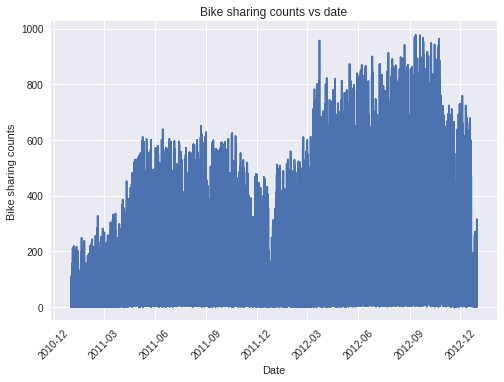

In [6]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Hourly counts over time
plt.plot(rides.dteday, rides.cnt)
plt.xlabel('Date')
plt.ylabel('Bike sharing counts')
plt.title('Bike sharing counts vs date')
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


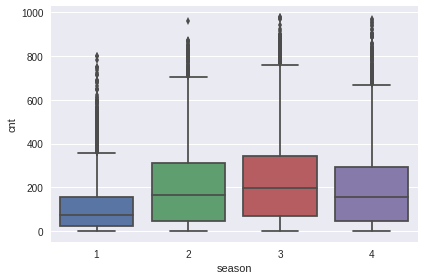

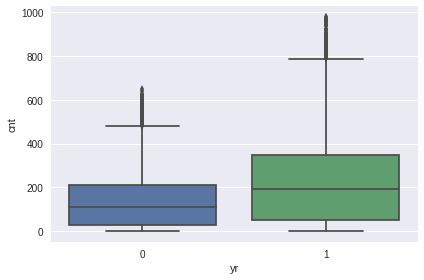

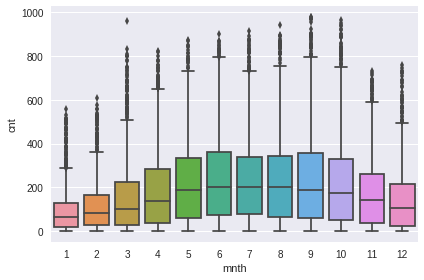

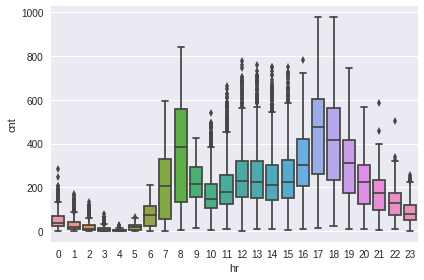

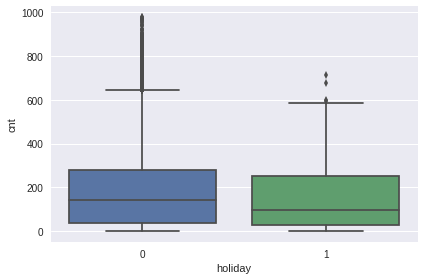

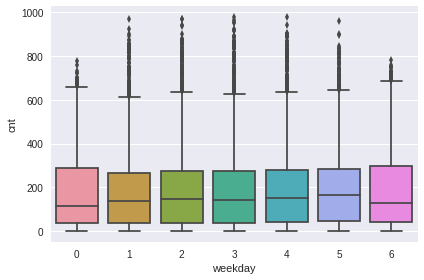

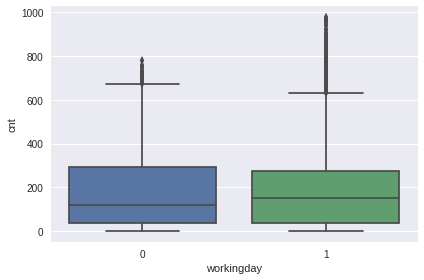

In [7]:
for x in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']:
    sns.boxplot(x=x, y="cnt", data=rides)
    plt.tight_layout()
    plt.show()

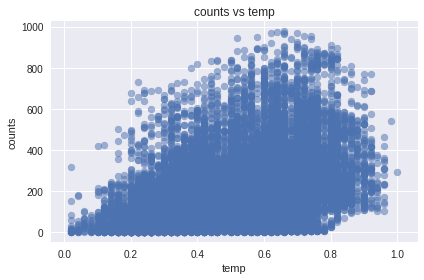

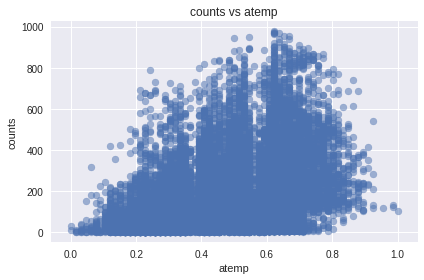

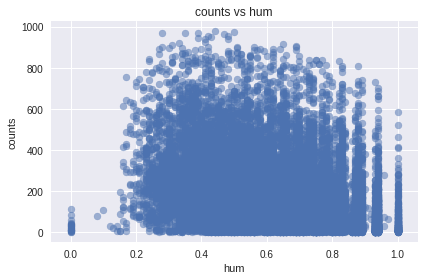

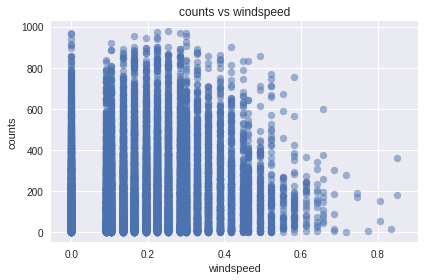

In [8]:
for x in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.scatter(rides[x], rides['cnt'], alpha=0.5)
    plt.ylabel('counts')
    plt.xlabel(x)
    plt.title(f'counts vs {x}')
    plt.tight_layout()
    plt.show()

## Data Preprocessing

In [9]:
# Import packages
from sklearn.preprocessing import MinMaxScaler

# Identify the fields that need to be one-hot encoded, dropped
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday', 'casual', 'registered']
# quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

# Identify the target fields
target_fields = ['cnt']

# Apply one-hot encoding on categorical features
rides_2 = pd.get_dummies(rides, columns=dummy_fields, drop_first=False)
print("> Applied one-hot encoding on categorical features")
print(f"> {rides_2.shape} rows and columns.")

# Drop some unnecessary columns
rides_2 = rides_2.drop(columns=fields_to_drop)
print("> Dropped unnecessary fields.")

# Separate the data into features and targets
X = rides_2.drop(target_fields, axis=1)
y = rides_2[target_fields]
print("> Separated into features X and target y")
print(f"> {X.shape} rows and columns in features dataset.")
print(f"> {y.shape} rows and columns in target dataset.")

# print columns in dataset
print(f"> Features selected: {list(X.columns)}")
print(f"> Target: {y.columns[0]}")

# Scale targets and features to have values in [0, 1]
# In the case of the target, we simply divide by 1000 to maintain interpretability
mmsc = MinMaxScaler()
X_2 = mmsc.fit_transform(X)
y = y / 1000
print(f"> Targets and features scaled.")

# Split into training, validation (during training) and test sets (after training).
# Set the testing set as the last 20 days
# From the remaining data, set the validation set as the last 60 days
# Set the remaining dataset as the training set

X_test = X_2[-20 * 24:]  # last 20 days
X_valid = X_2[-80 * 24:-20 * 24]  # last 80 - 20 = 60 days
X_train = X_2[:-80 * 24]  # from 0 to last 80 days
y_test = y[-20 * 24:]  # last 20 days
y_valid = y[-80 * 24:-20 * 24]  # last 80 - 20 = 60 days
y_train = y[:-80 * 24]  # from 0 to last 80 days
print(f"> Split into training, validation, and testing sets.")
[print(f"> {n}: {s.shape}") for n, s in zip(
    ('X_test', 'X_valid', 'X_train'), (X_test, X_valid, X_train))]
[print(f"> {n}: {s.shape}") for n, s in zip(
    ('y_test', 'y_valid', 'y_train'), (y_test, y_valid, y_train))];

> Applied one-hot encoding on categorical features
> (17379, 63) rows and columns.
> Dropped unnecessary fields.
> Separated into features X and target y
> (17379, 56) rows and columns in features dataset.
> (17379, 1) rows and columns in target dataset.
> Features selected: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
> Target: cnt
> Targets and features scaled.
> Split into training, validation, and testing sets.
> X_test: (480, 56)
> X_valid: (1440, 56)
> X_tr

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Neural Network Training

In [10]:
from sklearn.metrics import r2_score


class NN_reg():
    # get attributes and initiate weights
    def __init__(self,
                 X_train, y_train,
                 X_test, y_test,
                 num_hidden_layers,
                 nodes=[],
                 learning_rate=(0.1, 0.1),
                 activation=('linear', 'sigmoid', 'sigmoid')):

        self.input = X_train
        self.output = y_train
        self.X_test0 = X_test  # FOR TESTING PURPOSES DURING TRAINING
        self.y_test0 = y_test  # FOR TESTING PURPOSES DURING TRAINING

        self.num_hidden_layers = num_hidden_layers
        self.nodes = nodes
        self.lr = learning_rate
        self.activation = activation

        # RANDOM SEED
        np.random.seed(42)

        # UPDATE THIS
        # initiate weights
        self.weights = []
        self.best_weights = []
        for i in range(self.num_hidden_layers + 1):
            self.weights.append(
                2 * np.random.random((self.nodes[i], self.nodes[i + 1])) - 1)
            self.best_weights.append(self.weights[i])

        self.train_errors = []
        self.train_accs = []
        self.test_accs = []

    # functions

    def f(self, x, func_name, deriv=False):
        if func_name == 'sin':
            if(deriv == True):
                return np.cos(x)
            return np.sin(x)
        elif func_name == 'tanh':
            if(deriv == True):
                return 1.7159 * (1 - (np.tanh(2 * x / 3)**2)**2) / 3
            return 1.7159 * np.tanh(2 * x / 3)
        elif func_name == 'linear':
            if(deriv == True):
                return 1
            return x
        elif func_name == 'sigmoid':
            sig = 1 / (1 + np.exp(-x))
            if(deriv == True):
                return sig * (1 - sig)
            return sig

    def feed_forward(self, num_iter):

        for iters in range(num_iter):

            # initialize
            unactivated = []
            activated = []
            unactivated_test = []
            activated_test = []
            deltas = []

            # feed forward
            # 0 layer 0 activated
            activated.append(self.f(self.input, self.activation[0]))

            for i in range(self.num_hidden_layers + 1):
                unactivated.append(
                    np.dot(activated[i], self.weights[i]))
                activated.append(
                    self.f(unactivated[i], func_name=self.activation[i + 1]))

            y_out_nn = activated[-1][:]

            # Error Function
            error = self.output - y_out_nn
            self.train_errors.append(np.mean(np.abs(error)))

            # Train Accuracy
            train_acc = r2_score(y_out_nn, self.output)
            self.train_accs.append(train_acc)

            # Test Accuracy
            # 0 layer0 activated
            activated_test.append(self.f(self.X_test0, self.activation[0]))

            for i in range(self.num_hidden_layers + 1):
                unactivated_test.append(
                    np.dot(activated_test[i], self.weights[i]))
                activated_test.append(self.f(
                    unactivated_test[i], func_name=self.activation[i + 1]))

            y_out_test = activated_test[-1][:]

            test_acc = r2_score(y_out_test, self.y_test0)
            self.test_accs.append(test_acc)

            # APPENDING BEST WEIGHTS
            if iters > 4 and test_acc > max(self.test_accs[:-1]):
                for i in range(self.num_hidden_layers + 1):
                    self.best_weights[i] = self.weights[i]

            # print iteration results
            if (iters % int(num_iter / 10)) == 0:
                print("Iteration:", iters, "Abs Error=", np.mean(
                    np.abs(error)), "Test Acc=", test_acc)

            # gradient updates
            deltas.append(error * self.f(unactivated[self.num_hidden_layers],
                                         func_name=self.activation[self.num_hidden_layers + 1], deriv=True))

            for i in range(self.num_hidden_layers):
                deltas.append(deltas[i].dot(self.weights[self.num_hidden_layers - i].T) *
                              self.f(unactivated[self.num_hidden_layers - 1 - i], func_name=self.activation[self.num_hidden_layers - i], deriv=True))

            # update weights
            self.weights[self.num_hidden_layers] += self.lr[self.num_hidden_layers] * \
                activated[self.num_hidden_layers].T.dot(deltas[0])
            for i in range(1, self.num_hidden_layers):
                self.weights[i] += self.lr[i] * \
                    unactivated[self.num_hidden_layers -
                                1 - i].T.dot(deltas[i])
            self.weights[0] += self.lr[0] * \
                activated[0].T.dot(deltas[self.num_hidden_layers])

        print("done training")

    # Predict X_test, output y_predicted
    def predict(self, X_test):
        "Predict values using best weights"

        unactivated = []
        activated = []

        # 0 layer0 activated
        activated.append(self.f(X_test, self.activation[0]))
        for i in range(self.num_hidden_layers + 1):
            unactivated.append(
                np.dot(activated[i], self.weights[i]))
            activated.append(
                self.f(unactivated[i], func_name=self.activation[i + 1]))

        y_out_test = activated[-1][:]
        return y_out_test

In [11]:
X_train2 = X_train[:]
y_train2 = y_train.iloc[:, 0].values.reshape(-1, 1)

X_valid2 = X_valid[:]
y_valid2 = y_valid.iloc[:, 0].values.reshape(-1, 1)

X_test2 = X_test[:]
y_test2 = y_test[:]

nodes = [56, 56, 1]


NN_ = NN_reg(X_train2, y_train2,
             X_valid2, y_valid2,
             num_hidden_layers=1,
             nodes=nodes,
             learning_rate=(0.001, 0.0001),
             activation=('linear', 'sin', 'sigmoid'))

In [12]:
NN_.feed_forward(10000)

Iteration: 0 Abs Error= 0.23638916672092095 Test Acc= -0.509288559644135
Iteration: 1000 Abs Error= 0.0410214931347658 Test Acc= 0.6568894783340156
Iteration: 2000 Abs Error= 0.03294013370867404 Test Acc= 0.7847005336821314
Iteration: 3000 Abs Error= 0.02994408210175789 Test Acc= 0.8293452516703828
Iteration: 4000 Abs Error= 0.02820492267807189 Test Acc= 0.8511897802348622
Iteration: 5000 Abs Error= 0.02700217290727483 Test Acc= 0.8643651367760632
Iteration: 6000 Abs Error= 0.02612133046911139 Test Acc= 0.8727843459246212
Iteration: 7000 Abs Error= 0.025452726172845032 Test Acc= 0.8781783992139222
Iteration: 8000 Abs Error= 0.02492729526698418 Test Acc= 0.881569021554701
Iteration: 9000 Abs Error= 0.024501296095390063 Test Acc= 0.8836533729533358
done training


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


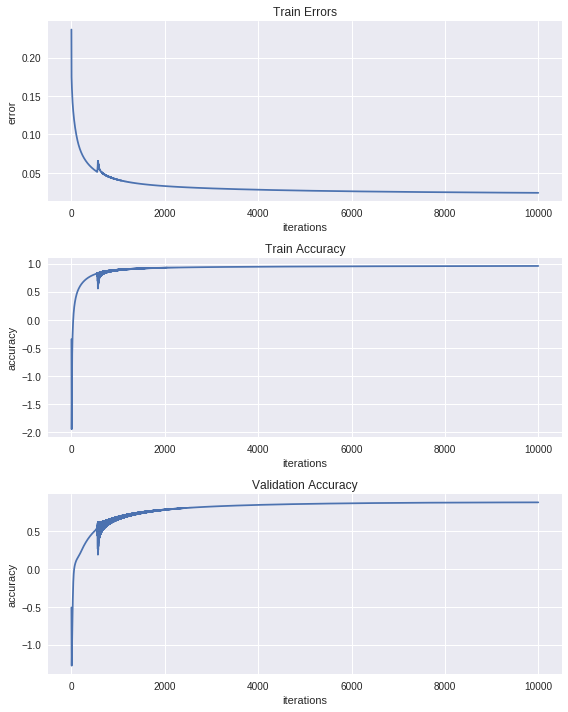

In [13]:
# Plot training error, training accuracy, and validation accuracy
f, ax = plt.subplots(3, 1, figsize=(8,10))
ax[0].plot(NN_.train_errors)
ax[0].set_title('Train Errors')
ax[0].set_xlabel('iterations')
ax[0].set_ylabel('error')

ax[1].plot(NN_.train_accs)
ax[1].set_title('Train Accuracy')
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('accuracy')
                 
ax[2].plot(NN_.test_accs)
ax[2].set_title('Validation Accuracy')
ax[2].set_xlabel('iterations')
ax[2].set_ylabel('accuracy')

plt.tight_layout()

In [14]:
# accuracy on testing set
from sklearn.metrics import r2_score

y_out_test = NN_.predict(X_test2)
test_acc = r2_score(y_out_test, y_test2)
test_acc

0.742487016073998

## Other ML Models

In this section, we define several machine learning regression functions, namely:

| Type                       	| <p align="left">Name</p>                            	|
|----------------------------	|----------------------------------	|
| Similarity-based learning  	| <p align="left">KNN Regressor</p>                    	|
| Error-based learning       	| <p align="left">Linear Regression</p>                	|
| Error-based learning       	| <p align="left">Support Vector Machine Regressor</p> 	|
| Informative-based learning 	| <p align="left">Decision Tree Regressor</p>          	|
| Informative-based learning 	| <p align="left">Random Forest Regressor</p>          	|
| Informative-based learning 	| <p align="left">Gradient Boosting Regressor</p>      	|
| Error-based learning       	| <p align="left">ARIMA</p>                           	|

#### Loading Packages

In [15]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [16]:
class ML_Regressor:

    def fit(self, X_train, X_test, y_train, y_test, ml_type,
            param_range, seed_settings=range(0, 3)):
        """
        Fit data to machine learning regressor. Iterate regression model 
        mutiple times. Return the maximum accuracy achieved and the
        corresponding parameter.

        Inputs
        ======
        feature: Dataframe of features
        target: Series of target values
        param_range: Range of values for parameters
        seed_settings: Range of seed settings to run

        Outputs
        =======
        acc_max: Float. Maximum regression accuracy achieved.
        param_max: Float. Regressor parameter that gives maximum accuracy.
        """

        self.param_range = param_range
        self.ml_type = ml_type

        train_acc = []
        test_acc = []

        feature_importance = []

        # Initiate counter for number of trials
        self.iterations = 0

        # Initial stuff
        self.kernel = 'rbf'

        # create an array of cols: parameters and rows: seeds
        for seed in seed_settings:

            # count one trial
            self.iterations += 1
            
            train = []
            test = []
            coefs = []

            # make a list of accuracies for different parameters
            for param in param_range:
                # build the model
                if ml_type == 'knn_reg':
                    self.clf = KNeighborsRegressor(n_neighbors=param)

                elif ml_type == 'lin_reg':
                    self.clf = LinearRegression()

                elif ml_type == 'ridge':
                    self.clf = Ridge(alpha=param)

                elif ml_type == 'lasso':
                    self.clf = Lasso(alpha=param, max_iter=self.max_iter)

                elif ml_type == 'linear_svm':
                    self.clf = LinearSVR(C=param)

                elif ml_type == 'svm':
                    self.clf = SVR(C=param, kernel=self.kernel)

                elif ml_type == 'decision_tree':
                    self.clf = DecisionTreeRegressor(max_depth=param)

                elif ml_type == 'random_forest':
                    self.clf = RandomForestRegressor(
                        max_features=int(np.log2(X_train.shape[1])), max_depth=param, n_estimators=100)

                elif ml_type == 'gbm':
                    self.clf = GradientBoostingRegressor(
                        max_features=param, n_estimators=500)

                # fit training set to classifier
                self.clf.fit(X_train, y_train)

                # record training set accuracy
                train.append(self.clf.score(X_train, y_train))

                # record generalization accuracy
                test.append(self.clf.score(X_test, y_test))

                # record coefficients if ml_type != knn_class
                # get coef @ 0.01
                if ml_type not in ("knn_reg", "svm", "decision_tree", "gbm") and param == 0.01:
                    coefs.append(self.clf.coef_)

                if ml_type in ("decision_tree", "gbm"):
                    feature_importance.append(self.clf.feature_importances_)

            # append the list to _acc arrays
            train_acc.append(train)
            test_acc.append(test)

        # compute mean and error across columns
        self.train_all = np.mean(train_acc, axis=0)
        self.test_all = np.mean(test_acc, axis=0)

        # compute mean coefficients
        if ml_type not in ("knn_reg", "svm", "decision_tree"):
            self.coefs_all = np.mean(coefs, axis=0).ravel()

        if ml_type in ("decision_tree", "gbm"):
            self.coefs_all = np.mean(feature_importance, axis=0)

        # compute variance of accuracies
        self.var_train = np.var(train_acc, axis=0)
        self.var_test = np.var(test_acc, axis=0)

        # compute the best parameter and maximum accuracy
        self.max_inds = np.argmax(self.test_all)
        self.acc_max = np.amax(self.test_all)
        self.param_max = (self.param_range)[self.max_inds]

        return np.round(self.acc_max, 4), self.param_max
    
    def predict(self, X_test, y_test):
        "Predict using optimal features"
        return self.clf.score(X_test, y_test)
        

    def plot(self, report=True):
        """
        Plot accuracy vs parameter for test and training data. Print
        maximum accuracy and corresponding parameter value. Print number of 
        trials.

        Inputs
        ======
        report: Boolean. Will show report if True

        Outputs
        =======
        Plot of accuracy vs parameter for test and training data
        Report showing number of maximum accuracy, optimal parameters
        and no. of iterations
        """

        if self.ml_type in ["linear_svm", "svm"]:
            plt.xscale("log")

        # plot train and errors and standard devs
        plt.plot(self.param_range, self.train_all, c='b',
                 label="training set", marker='.')
        plt.fill_between(self.param_range,
                         self.train_all + self.var_train,
                         self.train_all - self.var_train,
                         color='b', alpha=0.1)

        # plot test and errors and standard devs
        plt.plot(self.param_range, self.test_all,
                 c='r', label="test set", marker='.')
        plt.fill_between(self.param_range,
                         self.test_all + self.var_test,
                         self.test_all - self.var_test,
                         color='r', alpha=0.1)

        plt.xlabel('Parameter Value')
        plt.ylabel('Accuracy')
        plt.title(self.ml_type + ": Accuracy vs Parameter Value")
        plt.legend(loc=0)

        plt.tight_layout()
        plt.show()

        if report == True:
            print('Report:')
            print('=======')
            print("Max average accuracy: {}".format(
                np.round(self.acc_max, 4)))
            print("Var of accuracy at optimal parameter: {0:.4f}".format(
                self.var_test[self.max_inds]))
            print("Optimal parameter: {0:.4f}".format(self.param_max))
            print('Total iterations: {}'.format(self.iterations))

#### kNN Regressor

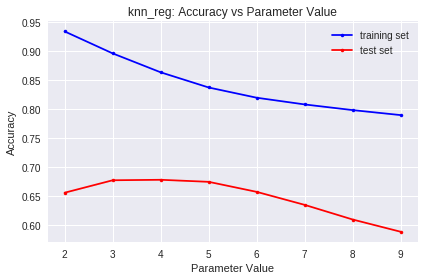

Report:
Max average accuracy: 0.6781
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 4.0000
Total iterations: 3


In [17]:
ml_reg = ML_Regressor()
param_range = range(2, 10)
_, param_knn_reg = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "knn_reg", param_range = param_range)
param_knn_reg = {'n neighbors', param_knn_reg}
ml_reg.plot()

In [18]:
# testing accuracy
knn = KNeighborsRegressor(n_neighbors=ml_reg.param_max)
knn.fit(X_train2, y_train2)
acc_knn_reg = knn.score(X_test2, y_test2)
acc_knn_reg

0.6847711804268214

#### Linear Regressor

In [19]:
# Linear regressor
reg = LinearRegression()
reg.fit(X_train2, y_train2)

acc_linear_reg = reg.score(X_test2, y_test2)
intercept_linear_reg = reg.intercept_
inds = np.argsort(np.abs(reg.coef_))[::-1]
top_predictor_linear_reg = X.columns[inds][0]

print("Best accuracy:",acc_linear_reg)
print("intercept:",intercept_linear_reg)
# print("coefs:", reg.coef_)
# print("Top predictor:", top_predictor_linear_reg)

Best accuracy: 0.4127991776367142
intercept: [-3.72835805e+12]


#### Lasso Regressor

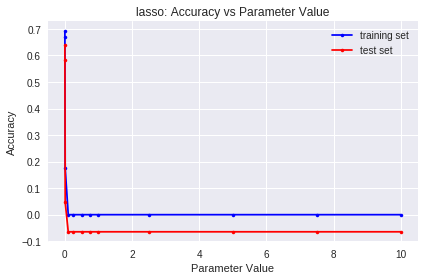

Report:
Max average accuracy: 0.6381
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 0.0001
Total iterations: 3


In [20]:
ml_reg = ML_Regressor()
ml_reg.max_iter = 10000
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
_, param_lasso = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "lasso", param_range = param_range)
param_lasso = {'alpha': param_lasso}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lasso = X.columns[inds]

In [21]:
# testing accuracy
ml = Lasso(ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_lasso = ml.score(X_test2, y_test2)
acc_lasso

0.44795485382326244

#### Ridge Regressor

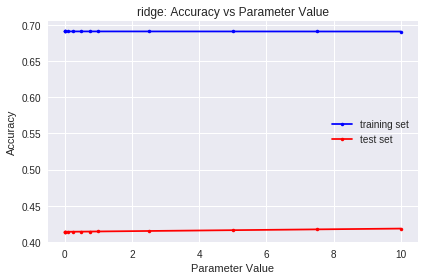

Report:
Max average accuracy: 0.4186
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 10.0000
Total iterations: 3


In [22]:
ml_reg = ML_Regressor()
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
acc_ridge, param_ridge = ml_reg.fit(X_train2, X_test2, y_train2, y_test2, "ridge", param_range = param_range)
param_ridge = {'alpha': param_ridge}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_ridge = X.columns[inds]

In [23]:
# testing accuracy
ml = Ridge(ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_ridge = ml.score(X_test2, y_test2)
acc_ridge

0.41864768156760596

#### Linear SVM Regressor

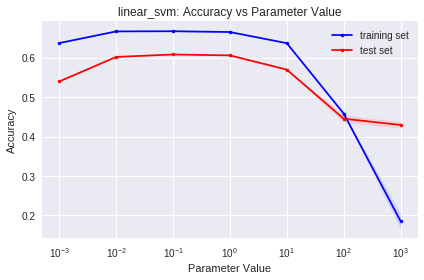

Report:
Max average accuracy: 0.6079
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 0.1000
Total iterations: 3


In [25]:
ml_reg = ML_Regressor()
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_lsvm, param_lsvm = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "linear_svm", param_range = param_range)
param_lsvm = {'C': param_lsvm}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lsvm = X.columns[inds]

In [26]:
# testing accuracy
ml = LinearSVR(C = ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_lsvm = ml.score(X_test2, y_test2)
acc_lsvm

0.330404299950246

#### Decision Tree

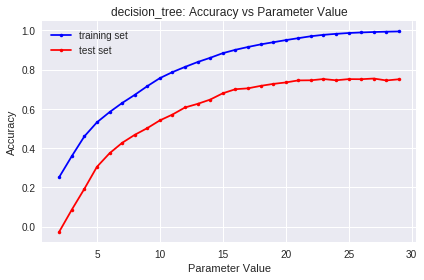

Report:
Max average accuracy: 0.755
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 27.0000
Total iterations: 3


In [27]:
ml_reg = ML_Regressor()
param_range = list(range(2, 30))
acc_dt, param_dt = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "decision_tree", param_range = param_range)
param_dt = {'max_depth': param_dt}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_dt = X.columns[inds]

In [28]:
# testing accuracy
ml = DecisionTreeRegressor(max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_dt = ml.score(X_test2, y_test2)
acc_dt

0.5051178358842905

#### Random Forest

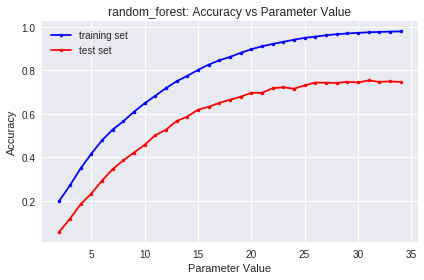

Report:
Max average accuracy: 0.7533
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 31.0000
Total iterations: 3


Index(['yr'], dtype='object')

In [29]:
ml_reg = ML_Regressor()
param_range = list(range(2, 35))
acc_rf, param_rf = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "random_forest", param_range = param_range)
param_rf = {'max_depth': param_rf}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_rf = X.columns[inds]
top_predictor_rf

In [30]:
# testing accuracy
ml = RandomForestRegressor(n_estimators = 100, max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_rf = ml.score(X_test2, y_test2)
acc_rf

0.7268040714665209

#### Gradient Boosting

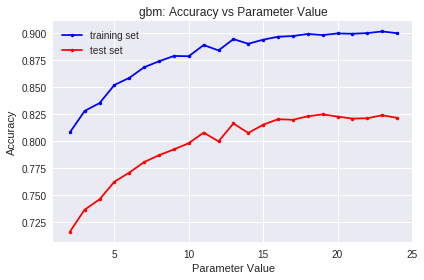

Report:
Max average accuracy: 0.8248
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 19.0000
Total iterations: 3


In [31]:
ml_reg = ML_Regressor()
param_range = list(range(2, 25))
acc_gbm, param_gbm = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "gbm", param_range = param_range)
param_gbm = {'max_depth': param_gbm}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_gbm = X.columns[inds]

In [32]:
# testing accuracy
ml = GradientBoostingRegressor(max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_gbm = ml.score(X_test2, y_test2)
acc_gbm

0.7340503070518734

### Summary

In [33]:
regressors = pd.Series(['knn_reg', 'linear_reg', 'lasso', 'ridge', 'linear_svm',
                        'decision_tree', 'random_forest', 'gbm'], name='ML_Type')
accuracies = pd.Series([acc_knn_reg, acc_linear_reg, acc_lasso, acc_ridge,
                        acc_lsvm, acc_dt, acc_rf, acc_gbm], name='Accuracy')
parameters = pd.Series([param_knn_reg, "-", param_lasso, param_ridge, param_lsvm, 
                        param_dt, param_rf, param_gbm], name='Best Parameter')
top_predictors = pd.Series(['-', top_predictor_linear_reg[0], top_predictor_lasso[0],
                            top_predictor_ridge[0], top_predictor_lsvm[0], top_predictor_dt[0],
                            top_predictor_rf[0], top_predictor_gbm[0]], name="Top Predictor")
df_summary = pd.concat([regressors, accuracies, parameters, top_predictors], axis=1)
df_summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,ML_Type,Accuracy,Best Parameter,Top Predictor
0,gbm,0.734050,{'max_depth': 19},temp
1,random_forest,0.726804,{'max_depth': 31},yr
2,knn_reg,0.684771,"{n neighbors, 4}",-
3,decision_tree,0.505118,{'max_depth': 27},temp
4,lasso,0.447955,{'alpha': 0.0001},temp
5,ridge,0.418648,{'alpha': 10},hr_17
6,linear_reg,0.412799,-,holiday
7,linear_svm,0.330404,{'C': 0.1},hr_17
